In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Mounted at /content/drive/
/content/drive/My Drive


# Data Exploration
We will read in the datasets and do preliminary exploration. We will look for patterns within the dataset. We will merge the dataset using our metric defined to calculate Credit Score

In [ ]:
data = pd.read_csv('application.csv')
credit = pd.read_csv('credit_record.csv')
credit.drop(columns=credit.columns[0], axis=1, inplace=True)
data.drop(columns = data.columns[0], axis = 1, inplace = True)
data.columns = ['Client number','Gender'
,'Own car','Own property','Number of children','Annual income','Income category','Education level','Marital status','Way of living','Age',
'Years Employed', 'Mobile phone',
'Work phone','Phone','Email','Occupation','Family size']
data[['Age','Years Employed']] = data[['Age','Years Employed']].div(-365)
data.head()

,Client number,Gender,Own car,Own property,Number of children,Annual income,Income category,Education level,Marital status,Way of living,Age,Years Employed,Mobile phone,Work phone,Phone,Email,Occupation,Family size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Client number       438557 non-null  int64  
 1   Gender              438557 non-null  object 
 2   Own car             438557 non-null  object 
 3   Own property        438557 non-null  object 
 4   Number of children  438557 non-null  int64  
 5   Annual income       438557 non-null  float64
 6   Income category     438557 non-null  object 
 7   Education level     438557 non-null  object 
 8   Marital status      438557 non-null  object 
 9   Way of living       438557 non-null  object 
 10  Age                 438557 non-null  float64
 11  Years Employed      438557 non-null  float64
 12  Mobile phone        438557 non-null  int64  
 13  Work phone          438557 non-null  int64  
 14  Phone               438557 non-null  int64  
 15  Email               438557 non-nul

In [ ]:
data['Client number'].nunique()

438510

In [ ]:
# We notice duplicate rows from the client number, we will drop them
data.drop_duplicates(subset=['Client number'])

,Client number,Gender,Own car,Own property,Number of children,Annual income,Income category,Education level,Marital status,Way of living,Age,Years Employed,Mobile phone,Work phone,Phone,Email,Occupation,Family size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62.238356,-1000.665753,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,43.668493,8.238356,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22.380822,1.019178,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.378082,-1000.665753,1,0,0,0,NaN,2.0


In [ ]:
data.describe()

,Client number,Number of children,Annual income,Age,Years Employed,Mobile phone,Work phone,Phone,Email,Family size
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,43.829876,-165.927878,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,11.465836,380.185752,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,20.517808,-1000.665753,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,34.284932,1.016438,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,42.821918,4.019178,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,53.378082,8.501370,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,69.043836,48.030137,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Client number       438557 non-null  int64  
 1   Gender              438557 non-null  object 
 2   Own car             438557 non-null  object 
 3   Own property        438557 non-null  object 
 4   Number of children  438557 non-null  int64  
 5   Annual income       438557 non-null  float64
 6   Income category     438557 non-null  object 
 7   Education level     438557 non-null  object 
 8   Marital status      438557 non-null  object 
 9   Way of living       438557 non-null  object 
 10  Age                 438557 non-null  float64
 11  Years Employed      438557 non-null  float64
 12  Mobile phone        438557 non-null  int64  
 13  Work phone          438557 non-null  int64  
 14  Phone               438557 non-null  int64  
 15  Email               438557 non-nul

In [ ]:
# Check number of null values per column
data.isna().sum()

Client number              0
Gender                     0
Own car                    0
Own property               0
Number of children         0
Annual income              0
Income category            0
Education level            0
Marital status             0
Way of living              0
Age                        0
Years Employed             0
Mobile phone               0
Work phone                 0
Phone                      0
Email                      0
Occupation            134203
Family size                0
dtype: int64

## Feature Engineering
We will transform our feature values into data suitable for our algorithms to run

In [ ]:
print(data['Occupation'].value_counts())

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: Occupation, dtype: int64


Occupation has many null data rows. Furthermore, the classification does not cover enough ground. In the future, when our data is exposed to new occupations that do not fall within the one of the categories it can lead to problems. Therefore, we will be column this column 

In [ ]:
data.drop(columns = ['Occupation'], inplace = True)


We will also drop Gender as it considering gender when deciding if credit cards should be approved may lead to social repercussions (https://www.bloomberg.com/news/articles/2021-03-01/amazon-is-sued-for-alleged-racial-and-gender-discrimination?leadSource=uverify%20wall) 

In [ ]:
data.drop(columns = ['Gender'], inplace = True)

We take a closer look at categorical columns

In [ ]:
print(data['Education level'].value_counts())
print ("\n")
print(data['Own car'].value_counts())
print ("\n")
print(data['Own property'].value_counts())
print ("\n")
print(data['Income category'].value_counts())
print ("\n")
print(data['Marital status'].value_counts())
print ("\n")
print(data['Way of living'].value_counts())

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: Education level, dtype: int64


N    275459
Y    163098
Name: Own car, dtype: int64


Y    304074
N    134483
Name: Own property, dtype: int64


Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: Income category, dtype: int64


Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: Marital status, dtype: int64


House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: Way of living, dtype: int64


There exists few broad categories within the remaining Categorical data. We will encode them into numeric values.

In [ ]:
labelencoder = LabelEncoder()
columns = ['Own car', 'Own property']
for c in columns:
  data[c] = labelencoder.fit_transform(data[c])

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [ ]:
for col in data.columns:
  if data[col].dtypes == 'object':
    data = encode_and_bind(data, col)
data.head()

,Client number,Own car,Own property,Number of children,Annual income,Income category,Education level,Marital status,Way of living,Age,...,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Way of living_Co-op apartment,Way of living_House / apartment,Way of living_Municipal apartment,Way of living_Office apartment,Way of living_Rented apartment,Way of living_With parents
0,5008804,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,...,0,0,0,0,0,0,0,0,1,0
1,5008805,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,...,0,0,0,0,0,0,0,0,1,0
2,5008806,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,...,1,0,0,0,0,1,0,0,0,0
3,5008808,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,...,0,0,1,0,0,1,0,0,0,0
4,5008809,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# Backup datafile
data2 = data.copy()

# Remove Classification Columns
for col in data.columns:
  if data[col].dtypes == 'object':
    data = data.drop(columns = col)
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 33 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Client number                                  438557 non-null  int64  
 1   Own car                                        438557 non-null  int64  
 2   Own property                                   438557 non-null  int64  
 3   Number of children                             438557 non-null  int64  
 4   Annual income                                  438557 non-null  float64
 5   Age                                            438557 non-null  float64
 6   Years Employed                                 438557 non-null  float64
 7   Mobile phone                                   438557 non-null  int64  
 8   Work phone                                     438557 non-null  int64  
 9   Phone                                

,Client number,Own car,Own property,Number of children,Annual income,Age,Years Employed,Mobile phone,Work phone,Phone,...,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Way of living_Co-op apartment,Way of living_House / apartment,Way of living_Municipal apartment,Way of living_Office apartment,Way of living_Rented apartment,Way of living_With parents
0,5008804,1,1,0,427500.0,32.890411,12.443836,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5008805,1,1,0,427500.0,32.890411,12.443836,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,5008806,1,1,0,112500.0,58.832877,3.106849,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,5008808,0,1,0,270000.0,52.356164,8.358904,1,0,1,...,0,0,1,0,0,1,0,0,0,0
4,5008809,0,1,0,270000.0,52.356164,8.358904,1,0,1,...,0,0,1,0,0,1,0,0,0,0


## Detecting Outliers
We will look for outliers in our numeric data

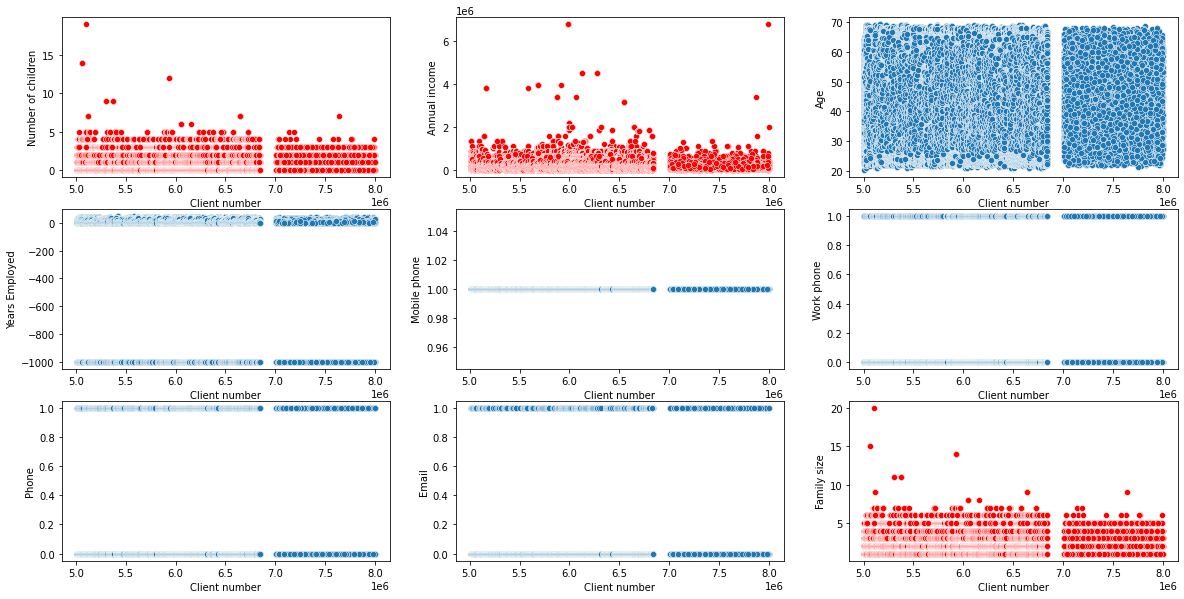

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (20,10))

sb.scatterplot(x='Client number', y='Number of children', data=data, ax=ax[0][0], color= 'red')
sb.scatterplot(x='Client number', y='Annual income', data=data, ax=ax[0][1], color='red')
sb.scatterplot(x='Client number', y='Age', data=data, ax=ax[0][2])
sb.scatterplot(x='Client number', y='Years Employed', data=data, ax=ax[1][0])
sb.scatterplot(x='Client number', y='Mobile phone', data=data, ax=ax[1][1])
sb.scatterplot(x='Client number', y='Work phone', data=data, ax=ax[1][2])
sb.scatterplot(x='Client number', y='Phone', data=data, ax=ax[2][0])
sb.scatterplot(x='Client number', y='Email', data=data, ax=ax[2][1])
sb.scatterplot(x='Client number', y='Family size', data=data, ax=ax[2][2], color= 'red')

We can notice some outliers within the plots in red - Number of Children, Annual Income, Family Size and Years Employed. It is highly likely that these may be error within the data collection and could cause errors during our prediction. Therefore, we will remove these clients.

In [ ]:
def filter_function(df,col):
  # Calculate quantile range between 1-99
  q_low = df[col].quantile(0.01)
  q_hi  = df[col].quantile(0.99)
  # Remove data which lie outside the quantile range.
  return df[(df[col] < q_hi) & (df[col] > q_low)]

for col_name in ['Number of children', 'Annual income', 'Family size','Years Employed']:
  data = filter_function(data,col_name)
  
data.head()

,Client number,Own car,Own property,Number of children,Annual income,Age,Years Employed,Mobile phone,Work phone,Phone,...,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Way of living_Co-op apartment,Way of living_House / apartment,Way of living_Municipal apartment,Way of living_Office apartment,Way of living_Rented apartment,Way of living_With parents
29,5008838,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,1,0,0,0,0,1,0,0,0,0
30,5008839,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,1,0,0,0,0,1,0,0,0,0
31,5008840,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,1,0,0,0,0,1,0,0,0,0
32,5008841,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,1,0,0,0,0,1,0,0,0,0
33,5008842,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,1,0,0,0,0,1,0,0,0,0


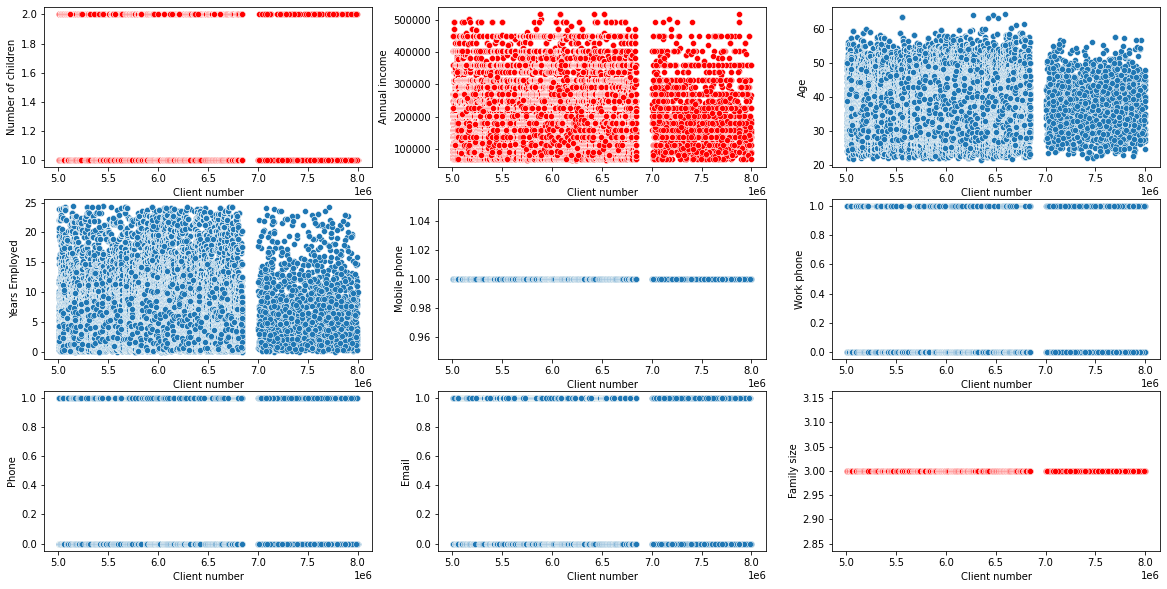

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (20,10))

sb.scatterplot(x='Client number', y='Number of children', data=data, ax=ax[0][0], color= 'red')
sb.scatterplot(x='Client number', y='Annual income', data=data, ax=ax[0][1], color='red')
sb.scatterplot(x='Client number', y='Age', data=data, ax=ax[0][2])
sb.scatterplot(x='Client number', y='Years Employed', data=data, ax=ax[1][0])
sb.scatterplot(x='Client number', y='Mobile phone', data=data, ax=ax[1][1])
sb.scatterplot(x='Client number', y='Work phone', data=data, ax=ax[1][2])
sb.scatterplot(x='Client number', y='Phone', data=data, ax=ax[2][0])
sb.scatterplot(x='Client number', y='Email', data=data, ax=ax[2][1])
sb.scatterplot(x='Client number', y='Family size', data=data, ax=ax[2][2], color= 'red')

Now we will take a look at the Credit Record dataset

In [ ]:
credit.head(20)

,id,month_bal,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1048575 non-null  int64 
 1   month_bal  1048575 non-null  int64 
 2   status     1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
credit.isna().sum()

id           0
month_bal    0
status       0
dtype: int64

We can see that there no null data values. We will proceed to dive into the specificities of the status column.

### Calculating Credit Score. 
When deciding whether or not to issue a credit card. Credit Score is the most 
important factor. Our data only provides us with the length of usage and the past dues. We will carefully decide whether the client should have been issued the credit card on hindsight.

In [ ]:
credit['status'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: status, dtype: int64

Client's Credit Ratings generally only start to take a hit after the loans are not repaid after 30 days. Hence, we will not penalize clients with 1-29 days past due.
https://www.thebalancemoney.com/what-does-it-mean-to-be-past-due-on-an-account-960739#:~:text=When%20an%20account%20is%20considered,fee%20to%20your%20credit%20card.

Credit Card Companies want their clients to be actively using their credit card. Having a 0% utilization rate shows that the clients are not using it and it does not positively affect their credit score. Therefore, we will replace all 'X' values with 0

https://www.cnbc.com/select/what-is-a-good-credit-utilization-ratio/

In [ ]:
credit['status'] = credit['status'].replace({'X':0})
credit.head()

,id,month_bal,status
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


We will create our formula for calculating credit score based on the data inside credit.

From the website below, we learn that credit card companies implement a penalty to increase the interest rates for clients that did not pay off their loans timely. This penalty is only removed after the client makes the next 6 payment on time. As an estimation, we will assign a score of 0.15 to 'C' which represents credit paid on time. For overdue loans, we penalize the clients credit score exponenetially.

https://www.thebalancemoney.com/what-does-it-mean-to-be-past-due-on-an-account-960739#:~:text=When%20an%20account%20is%20considered,fee%20to%20your%20credit%20card.

In [ ]:
credit['status'] = credit['status'].replace({'C':0.15})
credit['status'] = credit['status'].astype(float)
credit['status'] = credit['status'].apply(lambda x:-(x**2) if x >= 1 else x)
credit.head(20)

,id,month_bal,status
0,5001711,0,0.00
1,5001711,-1,0.00
2,5001711,-2,0.00
3,5001711,-3,0.00
4,5001712,0,0.15
5,5001712,-1,0.15
6,5001712,-2,0.15
7,5001712,-3,0.15
8,5001712,-4,0.15
9,5001712,-5,0.15


Now we will get a total credit score of the customers and classify whether they should have been issued the credit card.

In [ ]:
# Sum the total credit score of clients
new_credit = credit.groupby(["id"]).status.sum().reset_index()

#Create Function to determine if clients should be issued the card
def issue(row):
  # Check for favourable credit score
  if row['status'] >= 0:
    # Issue Card
    return 1
  else:
    # Don't issue card
    return 0

new_credit['Issue'] = new_credit.apply(lambda row: issue(row), axis = 1)
new_credit.drop(columns = 'status', inplace = True)
new_credit.head(10)

,id,Issue
0,5001711,1
1,5001712,1
2,5001713,1
3,5001714,1
4,5001715,1
5,5001717,1
6,5001718,0
7,5001719,1
8,5001720,0
9,5001723,1


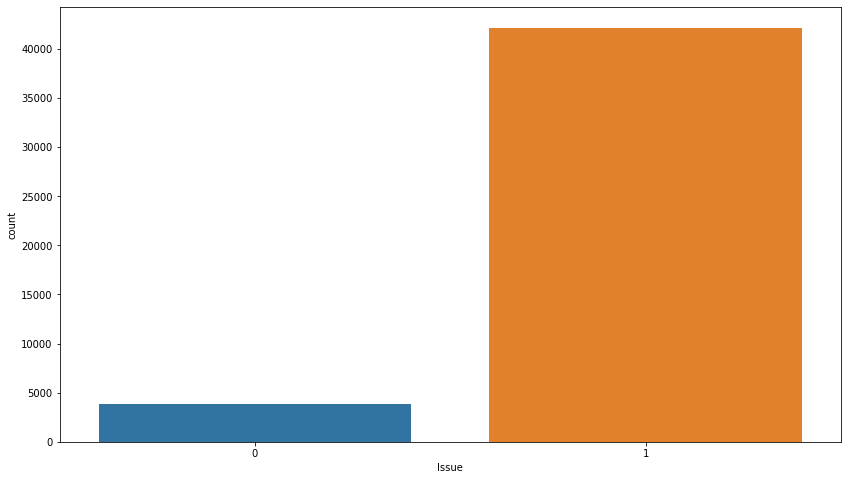

In [ ]:
ax = plt.subplots(figsize= (14,8))
ax = sb.countplot(x="Issue", data= new_credit)

From the plot, we can notice that the number of issues are significantly more than the number of no issues. This imbalance can cause our algorithms later to ignore the minority "No Issue" class. Hence we need to address this problem

### Merge Data sets
We will merge the total data sets based on the Client's identification number

In [ ]:
merged_data = data.join(new_credit.set_index('id'), on='Client number', how='inner')
merged_data.head(10)

,Client number,Own car,Own property,Number of children,Annual income,Age,Years Employed,Mobile phone,Work phone,Phone,...,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Way of living_Co-op apartment,Way of living_House / apartment,Way of living_Municipal apartment,Way of living_Office apartment,Way of living_Rented apartment,Way of living_With parents,Issue
29,5008838,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,0,0,0,0,1,0,0,0,0,1
30,5008839,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,0,0,0,0,1,0,0,0,0,1
31,5008840,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,0,0,0,0,1,0,0,0,0,1
32,5008841,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,0,0,0,0,1,0,0,0,0,1
33,5008842,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,0,0,0,0,1,0,0,0,0,1
34,5008843,0,1,1,405000.0,32.443836,5.523288,1,0,0,...,0,0,0,0,1,0,0,0,0,1
62,5008868,0,1,1,211500.0,44.416438,19.449315,1,0,0,...,0,0,0,0,1,0,0,0,0,1
63,5008870,0,1,1,211500.0,44.416438,19.449315,1,0,0,...,0,0,0,0,1,0,0,0,0,1
144,5008951,0,1,1,225000.0,28.276712,7.693151,1,0,0,...,0,0,0,0,1,0,0,0,0,1
145,5008952,0,1,1,225000.0,28.276712,7.693151,1,0,0,...,0,0,0,0,1,0,0,0,0,1


We will extract data to be used for the algorithms

In [ ]:
# Extract data without classification and Client Number 
all_X = merged_data.iloc[:,1:-1]
# Extract classification
all_y = merged_data.iloc[:,-1]

In [ ]:
oversample = SMOTE()
all_X_balanced, all_y_balanced = oversample.fit_resample(all_X, all_y)

We can see that our sample issues has been solved through balancing.

# Algorithm Implementation
We will move on to implement our Machine Learning Models
- Random Forest
- K-Nearest neighbors
- Logistic Regression 
- Naive Bayes Classification

In [ ]:
#"List_of_Candidate_IV = []
#Credit_Dataset = #Matrix dataset based on List_of_Candidate_IV, with the last column on the right being the y-value

In [ ]:
#Random Forest
# n_estimators = i : i Decision Trees in the forest
# random_state = 100 : Controls both the randomness of the bootstrapping of the samples used when building trees, and the sampling of the features to consider when looking for the best split at each node

Random_Forest_Models = [ ] 

for i in range(50,150,10):
  Random_Forest_Model = RandomForestClassifier(n_estimators = i, random_state = 0)
  Random_Forest_Models += [Random_Forest_Model,]


In [ ]:
#Logistic Regression

Logistic_Regression_Model = LogisticRegression(random_state=0,max_iter=1000)


In [ ]:
#Naive Bayes Classifier

Naive_Bayes_Model = MultinomialNB()#To include model here. Variable name will be referenced in N-fold Cross validation below. 

In [ ]:
#Finding optimal range of K value  
score=[]
K_num=[]
for i in range(1,100,10):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  score+=[cross_val_score(knn_model,all_X_balanced,all_y_balanced,cv = 10,scoring = "precision").mean(),]
  K_num+=[i,]


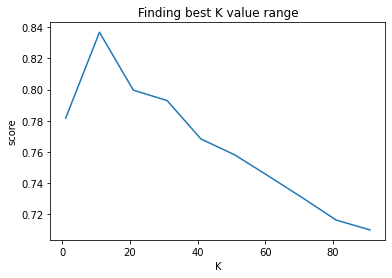

In [ ]:
plt.plot(K_num, score)
plt.xlabel('K')
plt.ylabel('score')
plt.title("Finding best K value range")
plt.show()

In [ ]:
#KNN algorithm
Knn_models = [ ] 

# We will store 10 diffrent variation of KNN model into a list to be tested later
for i in range(3,22,2):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  Knn_models += [knn_model,]




In [ ]:
#10-fold-cross validation. 
#For each model, get the average metric score. Based on the average metric score of each model, determine which model is the best

#Step 1: Function that gets average metric score of the model, using 10-fold-cross validation
metric = "precision" 

#scorer = sklearn.metrics.make_scorer(metric_function,greater_is_better = True)
def get_average_metric_score(Model):
  X = all_X_balanced
  y = all_y_balanced #A array of arrays. Not a single array.
  scalar = MinMaxScaler()
  pipeline = Pipeline([('transformer1', scalar), ('estimator', Model)])
  score_from_each_fold = cross_val_score(pipeline,X,y,cv = 10,scoring =metric)
  return np.average(score_from_each_fold)
#Step 2: Dictionary containing the average metric scores of the different models
Model_scores = {}
#Model_scores["Random_Forest"] = get_average_metric_score(Random_Forest_Model)
Model_scores["Logistic_Regression"] = get_average_metric_score(Logistic_Regression_Model)
Model_scores["Naive_Bayes"] = get_average_metric_score(Naive_Bayes_Model)
#Assuming increments of k is 2 and starts with k = 3.
K_number = 3
for k_model in Knn_models:     
  Model_scores[f"{K_number}_nn"] = get_average_metric_score(k_model)
  K_number+=2

#Random Forest
n_trees = 50
for Random_Forest_Model in Random_Forest_Models:     
  Model_scores[f"{n_trees}_trees"] = get_average_metric_score(Random_Forest_Model)
  n_trees+=10

#Step 3: Finding out which model is the best
best_model_with_score = max(list(Model_scores.items()), key = lambda tup: tup[1])
print(f"The best model to use is {best_model_with_score[0]} as it has the highest {metric}, with the {metric} being {best_model_with_score[1]}")


The best model to use is 110_trees as it has the highest precision, with the precision being 0.938947672866175


In [ ]:
print(Model_scores)

{'Logistic_Regression': 0.7073324616881067, 'Naive_Bayes': 0.6906524793763774, '1_nn': 0.8686915536789757, '3_nn': 0.912261240837377, '5_nn': 0.9093126432084757, '7_nn': 0.9004638212780651, '9_nn': 0.896783780000342, '11_nn': 0.892031569514697, '13_nn': 0.8891998113697861, '15_nn': 0.8896106874975604, '17_nn': 0.8900906443606145, '19_nn': 0.8860720558758592, '50_trees': 0.9317985527068119, '60_trees': 0.9316508010900094, '70_trees': 0.9331252881801435, '80_trees': 0.9316131893340209, '90_trees': 0.9322528301732014, '100_trees': 0.9324701566160506, '110_trees': 0.9330005853566693, '120_trees': 0.9317925445728321, '130_trees': 0.9322606616586565, '140_trees': 0.9327890862241904}


In [ ]:
Model_scores_final4={'Logistic_Regression': Model_scores['Logistic_Regression'], 'Naive_Bayes': Model_scores['Naive_Bayes']}
x = []
y = []
for md,score in Model_scores.items():
  if md[-2:] == "nn":x.append((md,score))
  elif md[-5:] == "trees":y.append((md,score))
Model_scores_final4[max(x,key= lambda pair: pair[1])[0]] = max(x,key= lambda pair: pair[1])[1]
Model_scores_final4[max(y,key= lambda pair: pair[1])[0]] = max(y,key= lambda pair: pair[1])[1]
print(Model_scores_final4)

df = pd.DataFrame(list(Model_scores_final4.items()), columns = ['Model', 'Average Precision Scores'])

df

{'Logistic_Regression': 0.7073324616881067, 'Naive_Bayes': 0.6906524793763774, '3_nn': 0.912261240837377, '70_trees': 0.9331252881801435}


,Model,Average Precision Scores
0,Logistic_Regression,0.707332
1,Naive_Bayes,0.690652
2,3_nn,0.912261
3,70_trees,0.933125
